In [50]:
import csv
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

- Number of times pregenant
- Plasma glucose concentration
- Diastolic blood pressure
- Triceps skin fold thickness
- 2-Hour serum insulin
- Body-Mass index
- Diabetes pedigree function
- Age
- HasDiabetes

In [51]:
names=["NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]
dataset=pd.read_csv('pima-indians-diabetes.csv',names=names);

In [52]:
dataset

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [53]:
dataset.shape

(768, 9)

In [54]:
dataset.dtypes

NumTimesPrg        int64
PlGlcConc          int64
BloodP             int64
SkinThick          int64
TwoHourSerIns      int64
BMI              float64
DiPedFunc        float64
Age                int64
HasDiabetes        int64
dtype: object

In [55]:
dataset.describe()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


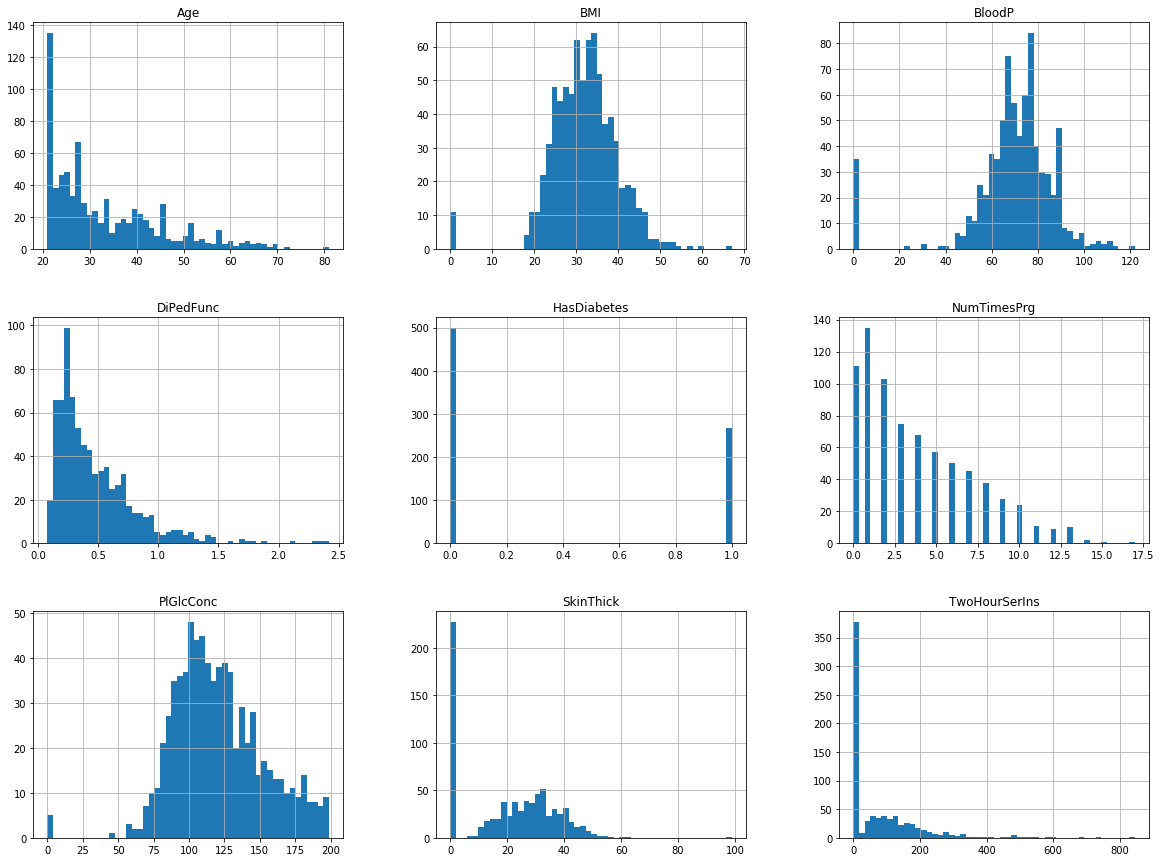

In [56]:
dataset.hist(bins=50, figsize=(20,15));
plt.show();

1. Load data
2. Split data into training and testing sets
3. Summarize the data based on class
4. Make a prediction
5. Check the accuracy

## Split Data

In [57]:
def splitData(data, splitRatio):
    trainSize = int(len(data) * splitRatio)
    trainSet = []
    testSet = list(data)
    
    while len(trainSet) < trainSize:
        index = random.randrange(len(testSet))
        trainSet.append(testSet.pop())
        
    return [trainSet, testSet]

In [58]:
def seperateByClass(data):
    seperated = {}
    
    for i in range(len(data)):
        vector = data[i]
        if(vector[-1] not in seperated):
            seperated[vector[-1]] = []
            
        seperated[vector[-1]].append(vector)
        
    return seperated


## Summarization of data

In [59]:
def summarize(data):
    summaries = [(mean(attribute), stddev(attribute)) for attribute in zip(*data)]
    del summaries[-1]
    return summaries

def summarizeByClass(data):
    seperated = seperateByClass(data)
    summaries = {}
    for classValue, instances in seperated.items():
        summaries[classValue] = summarize(instances)
        
    return summaries

## Mathematical functions

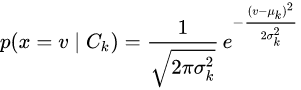

In [60]:
def mean(data):
    return sum(data)/float(len(data))

def stddev(data):
    avg = mean(data) 
    var = (sum(pow(x-avg, 2) for x in data))/float(len(data)-1) # Using Bassel Correction 
    
    return math.sqrt(var)

In [61]:
def calculateProbability(data, mean, stddev):
    exp = math.exp((-(math.pow(data-mean, 2)))/float(2*math.pow(stddev, 2)))
    return 1/(math.sqrt(2*math.pi*math.pow(stddev, 2))) * exp

## Predictions and Accuracy

In [62]:
def calculateClassProbability(summaries, vector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stddev = classSummaries[i]
            x = vector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stddev)
            
    return probabilities

In [63]:
def predict(summaries, vector):
    probabilities = calculateClassProbability(summaries, vector)
    bestLabel, bestProb = None, -1
    
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
            
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
        
    return predictions

In [64]:
def getAccuracy(testSet, predictions):
    correct = 0
    
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
            
    return (correct/float(len(testSet)))*100.0

In [65]:
def main(splitRatio, verbose = 1):
    
    data = dataset.values.tolist()
    
    trainingSet, testSet = splitData(data, splitRatio)
    if verbose is 1:
        print("Split {0} rows into {1} training and {2} testing rows".format(len(data), len(trainingSet), len(testSet)))   
    
    summaries = summarizeByClass(trainingSet)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    
    if verbose is 1:
        print("Accuracy : {0:.3f}%".format(accuracy))
        
    return accuracy

main(0.78)

Split 768 rows into 599 training and 169 testing rows
Accuracy : 74.556%


74.55621301775149